# transform lat/long of a set of points into  lat/long of grids on a .nc file

In [1]:
%matplotlib inline
import os
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap as bma
import xray

In [2]:
nc_path = '/home/ek777/Documents/Downscaling/ncep_monthly_mean/surface'
nc_name = 'air.mon.mean.nc'
dset = xray.open_dataset(os.path.join(nc_path, nc_name))

In [3]:
dset

<xray.Dataset>
Dimensions:  (lat: 73, level: 17, lon: 144, time: 811)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 1948-03-01 ...
Data variables:
    air      (time, level, lat, lon) float64 -33.91 -33.91 -33.91 -33.91 ...
Attributes:
    description:  Data from NCEP initialized reanalysis (4x/day).  These are interpolated to pressure surfaces from model (sigma) surfaces.
    platform: Model
    Conventions: COARDS
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived.html
    NCO: 20121012
    history: Mon Jul  5 21:45:36 1999: ncrcat air.mon.mean.nc /Datasets/ncep.reanalysis.derived/pressure/air.mon.mean.nc /dm/dmwork/nmc.rean.ingest/combinedMMs/air.mon.mean.nc
/home/hoop/crdc/cpreanjuke2farm/cpre

In [51]:
dset.sel(time='1990-06-1', level=1000, lat=np.array([37.5,40]), lon=[115,120])['air'].data

array([[ 26.66000366,  21.82000732],
       [ 27.24000549,  23.02000427]])

In [11]:
dsub.data

array(26.660003662109375)

In [30]:
def p2c(pLat = 37, pLon = 116,iLat = 2.5,iLon = 2.5):
    
    pLat = np.array(pLat)
    pLon = np.array(pLon)
    
    cLat = ((pLat + iLat / 2) / iLat).astype(int) * iLat
    cLon = ((pLon + iLon / 2) / iLon).astype(int) * iLon

    return (cLat,cLon)




In [20]:
clat, clon = p2c(37.001,115.9)
print (clat, clon)
dset.sel(time='1990-06-1', level=1000, lat=clat, lon=clat)['air'].data

(37.5, 115.0)


array(26.850006103515625)

In [31]:
x=np.array([37,37.1])
y=np.array([115.9,116])
clat, clon = p2c(x,y)
print [clat, clon]

(array([ 37.5,  37.5]), array([ 115.,  115.]))


In [32]:
x=37
y=115.9
clat, clon = p2c(x,y)
print (clat, clon)

(37.5, 115.0)


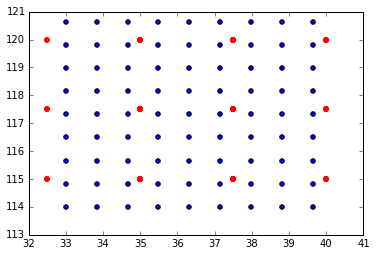

In [47]:
xs = np.arange(33,40,0.83)
ys = np.arange(114,121,0.83)
zx,zy = p2c(xs,ys)
zxs,zys = np.meshgrid(zx,zy)
xss,yss = np.meshgrid(xs,ys)
#zs = p2c(xs,ys)
plt.scatter(xss,yss)
plt.scatter(zxs,zys,color='red')